In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


# folders paths
train_path = "C:/Users/WeixiLi/savormetrics/Gideon Niemelainen - Weixi/Produce/Broccoli/train"
test_path = "C:/Users/WeixiLi/savormetrics/Gideon Niemelainen - Weixi/Produce/Broccoli/test"

In [2]:
IMG_WIDTH = 240
IMG_HEIGHT = 320
BATCH_SIZE = 64

In [3]:
# Data agumentation and pre-processing using tensorflow
gen = ImageDataGenerator(
                  rescale=1./255.,
                  horizontal_flip = True,
                  vertical_flip = True,
                  validation_split=0.2, # training: 80% data, validation: 20% data
                  brightness_range=[0.2,1.0]
                 )
 
train_generator = gen.flow_from_directory(
    #labels, # dataframe
    #directory = 
    train_path, # images data path / folder in which images are there
    #x_col = 'id',
    #y_col = 'breed',
    subset="training",
    color_mode="rgb",
    target_size = (IMG_WIDTH,IMG_HEIGHT), # image height , image width
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)
 
validation_generator = gen.flow_from_directory(
    #labels, # dataframe
    #directory = 
    train_path, # images data path / folder in which images are there
    #x_col = 'id',
    #y_col = 'breed',
    subset="validation",
    color_mode="rgb",
    target_size = (IMG_WIDTH,IMG_HEIGHT), # image height , image width
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)

Found 497 images belonging to 4 classes.
Found 123 images belonging to 4 classes.


In [4]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : 1
1 : 2
2 : 3
3 : 4


In [5]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),
        
        Flatten(),
        
        Dense(units=4, activation='relu'),
        Dropout(0.5),
        Dense(units=4, activation='softmax')
    ])
    
    return model

In [6]:
cnn_model = create_model()

In [7]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 236, 316, 128)     9728      
                                                                 
 activation (Activation)     (None, 236, 316, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 118, 158, 128)    0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 118, 158, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 116, 156, 64)      73792     
                                                                 
 activation_1 (Activation)   (None, 116, 156, 64)      0

In [8]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5)

In [9]:
optimizer = Adam(learning_rate=0.001)

In [10]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [11]:
history = cnn_model.fit(train_generator, epochs=10, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/10
8/8 - 167s - loss: 2.3595 - accuracy: 0.4869 - val_loss: 1.3912 - val_accuracy: 0.5935 - lr: 0.0010 - 167s/epoch - 21s/step
Epoch 2/10
8/8 - 159s - loss: 1.3863 - accuracy: 0.5835 - val_loss: 1.3930 - val_accuracy: 0.3496 - lr: 0.0010 - 159s/epoch - 20s/step
Epoch 3/10
8/8 - 157s - loss: 1.3728 - accuracy: 0.5855 - val_loss: 2.0335 - val_accuracy: 0.3333 - lr: 0.0010 - 157s/epoch - 20s/step
Epoch 4/10
8/8 - 155s - loss: 1.4520 - accuracy: 0.5855 - val_loss: 2.9736 - val_accuracy: 0.2927 - lr: 0.0010 - 155s/epoch - 19s/step
Epoch 5/10
8/8 - 158s - loss: 1.3785 - accuracy: 0.5835 - val_loss: 2.3752 - val_accuracy: 0.3415 - lr: 0.0010 - 158s/epoch - 20s/step
Epoch 6/10
8/8 - 156s - loss: 1.3648 - accuracy: 0.5835 - val_loss: 2.6303 - val_accuracy: 0.3984 - lr: 0.0010 - 156s/epoch - 20s/step
Epoch 7/10
8/8 - 157s - loss: 1.3614 - accuracy: 0.5835 - val_loss: 3.2550 - val_accuracy: 0.3496 - lr: 2.0000e-04 - 157s/epoch - 20s/step
Epoch 8/10
8/8 - 157s - loss: 1.3604 - accuracy: 0.

In [12]:
cnn_model.save("cnn_Model.h5")

In [13]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

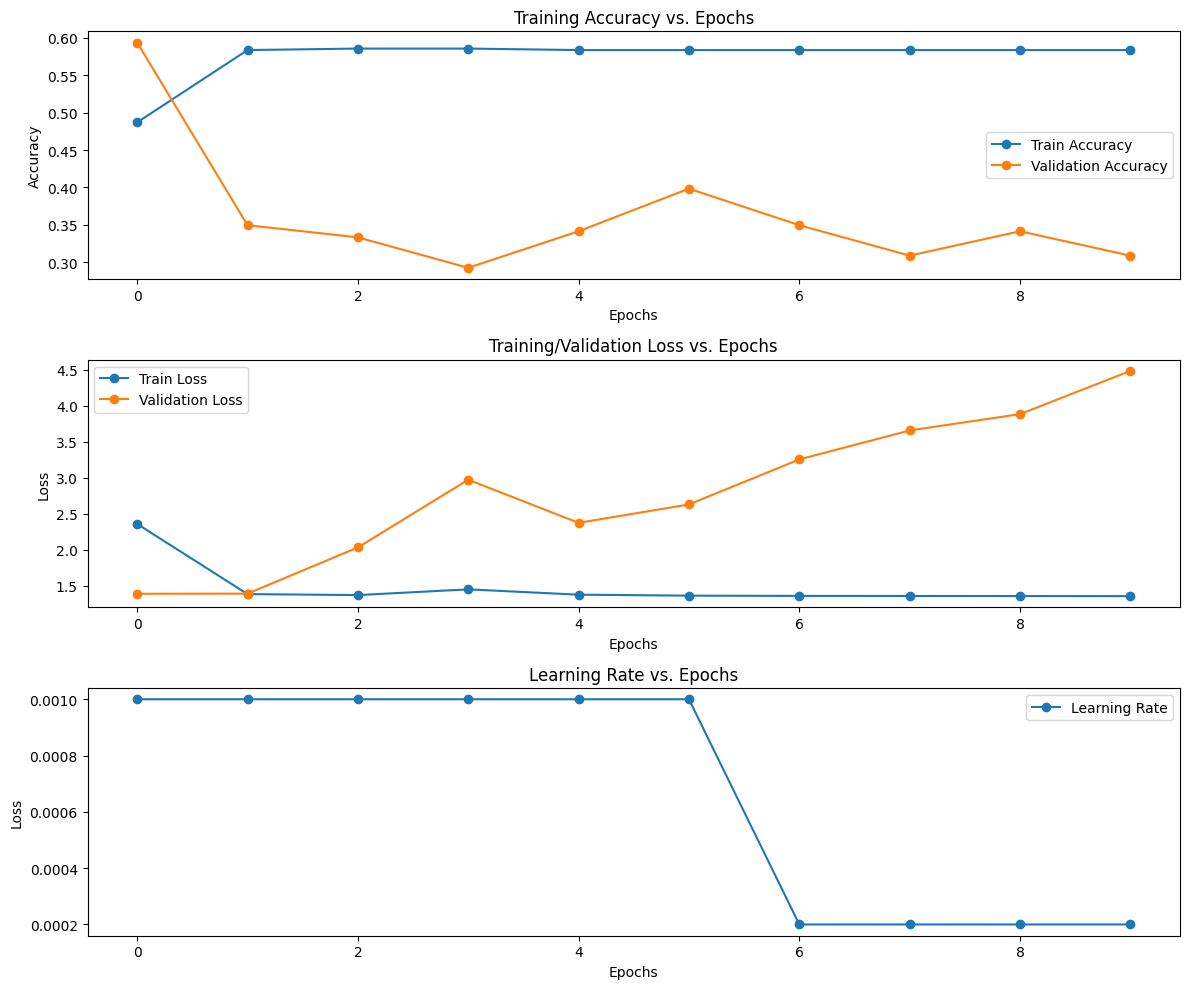

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [15]:
accuracy_score = cnn_model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

2/2 [==============================] - 15s 6s/step - loss: 4.2677 - accuracy: 0.3008
[4.267672538757324, 0.3008130192756653]
Accuracy: 30.0813%
Loss:  4.267672538757324


In [16]:
test_datagen = ImageDataGenerator(
                  rescale=1./255.,
                  #horizontal_flip = True,
                  #vertical_flip = True,
                  #validation_split=0.2, # training: 80% data, validation: 20% data
                  #brightness_range=[0.2,1.0]
                 )

test_generator = test_datagen.flow_from_directory(test_path,
                                                 shuffle=False,
                                                 batch_size=64,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 380 images belonging to 4 classes.


In [17]:
predictions = cnn_model.predict(test_generator)

6/6 [==============================] - 48s 8s/step


In [18]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=64)

6/6 [==============================] - 43s 7s/step - loss: 4.5531 - accuracy: 0.3184


In [19]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     4.553145408630371
Test Accuracy: 0.31842106580734253


In [20]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

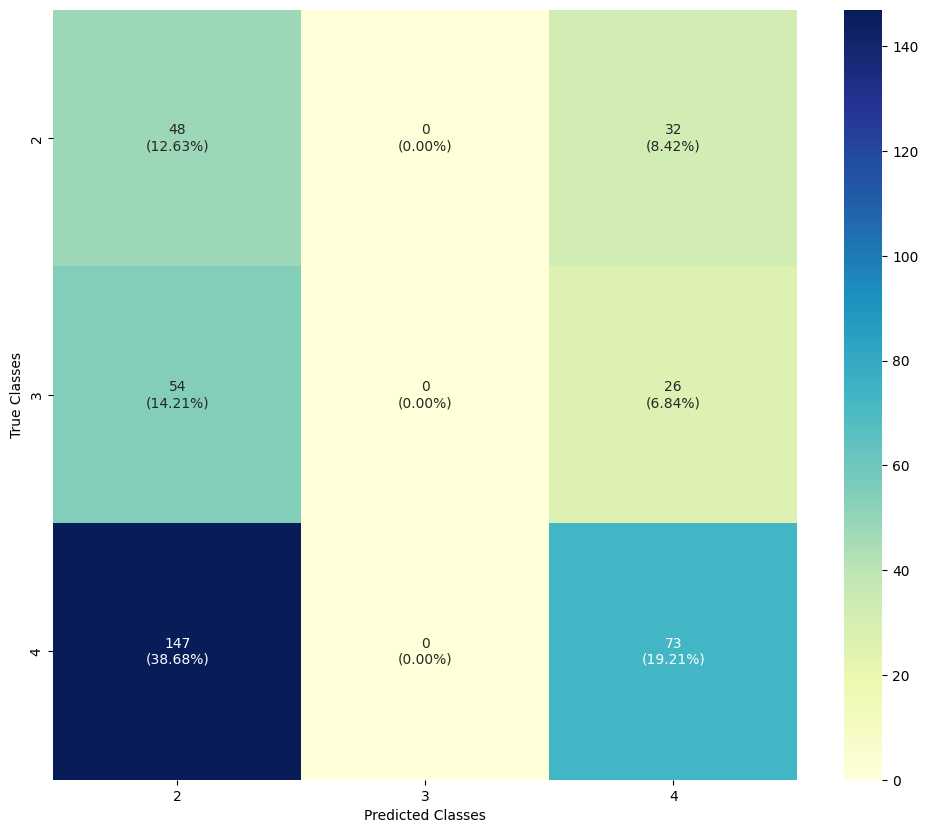

In [21]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(3, 3)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=[2,3,4], yticklabels=[2,3,4],
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()